<a href="https://colab.research.google.com/github/TrishankV/Sem7/blob/main/learn_DL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


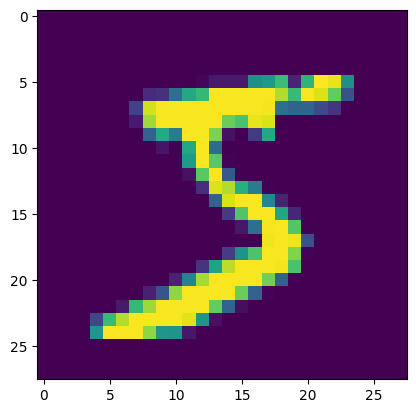

In [13]:
plt.imshow(X_train[0])

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


numpy.uint8

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , InputLayer
from tensorflow.keras.utils import to_categorical

In [16]:
def normalisation(X_train, X_test):
    X_train = X_train / 255
    X_test = X_test / 255
    return X_train, X_test

In [17]:
normalisation(X_train , y_train)

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [18]:
y_train , y_test = to_categorical(y_train) , to_categorical(y_test)

In [19]:
num_classes = y_test.shape[1]
print(num_classes)

10


In [20]:
number_of_pixels = X_train.shape[1] * X_train.shape[2]
print(number_of_pixels)

784


In [47]:
X_train.shape

(60000, 28, 28)

In [97]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(InputLayer(input_shape = (28,28,1)))
model.add(Flatten())
model.add(Dense(256 , activation = 'relu'))
model.add(Dropout(0.03))
model.add(Dense(10 , activation = 'softmax'))

model.compile(optimizer = Adam() , loss = "categorical_crossentropy" )

In [93]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
model.fit(X_train , y_train , epochs = 10 , batch_size = 128 , validation_data = (X_test,y_test))
scores = model.evaluate(X_test , y_test)
scores

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 4.5896 - val_loss: 0.9066
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5657 - val_loss: 0.4811
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2840 - val_loss: 0.3899
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1994 - val_loss: 0.3786
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1589 - val_loss: 0.3822
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1602 - val_loss: 0.3727
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1501 - val_loss: 0.3159
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1442 - val_loss: 0.4171
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1482 - val_loss: 0.2852
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3283


0.32826927304267883

In [94]:
type(scores)

float

In [100]:

# Calculate accuracy and precision
from sklearn.metrics import accuracy_score, precision_score
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multi-class

print("Accuracy:", accuracy)
print("Precision:", precision)


313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9592
Precision: 0.9591135438795897


In [116]:
# using Covolutional Nueral network
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D , MaxPooling2D
CNN_model = Sequential()
CNN_model.add(InputLayer(input_shape = (28,28,1)))
CNN_model.add(Conv2D(128 , (10,10) , activation = 'relu'))
CNN_model.add(MaxPooling2D(pool_size = (4,4)))
CNN_model.add(Flatten())
CNN_model.add(Dense(256 , activation = 'relu'))
CNN_model.add(Dropout(0.03))
CNN_model.add(Dense(10 , activation = 'softmax'))
model.compile(optimizer = Adam(learning_rate = 0.0001) , loss = "categorical_crossentropy" )

In [117]:
CNN_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 19, 19, 128)       12928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_47 (Dense)            (None, 256)               524544    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 10)                2570      
                                                     

In [118]:
model.fit(X_train , y_train , epochs = 100 , batch_size = 256 , validation_data = (X_test,y_test))
scores = model.evaluate(X_test , y_test)

Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0513 - val_loss: 0.3771
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0287 - val_loss: 0.3645
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0217 - val_loss: 0.3623
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0188 - val_loss: 0.3532
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0172 - val_loss: 0.3526
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0161 - val_loss: 0.3572
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0167 - val_loss: 0.3480
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.3447
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0147 - val_loss: 0.3432
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0124 - va

In [119]:
from sklearn.metrics import accuracy_score, precision_score
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multi-class

print("Accuracy:", accuracy)
print("Precision:", precision)


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9776
Precision: 0.9774100181491747


In [150]:
# prompt: a code to recognise which number is form an user inputted image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
from sklearn.metrics import accuracy_score, precision_score
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from PIL import Image
from google.colab import files

# ... (your existing code for model training) ...

# Function to preprocess the uploaded image
def preprocess_image(image_path):
  img = Image.open(image_path).convert('L')  # Convert to grayscale
  img = img.resize((28, 28))  # Resize to 28x28 pixels
  img_array = np.array(img)
  img_array = img_array / 255.0  # Normalize pixel values
  img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input
  return img_array

# Upload an image file
uploaded = files.upload()

# Get the uploaded file name
for fn in uploaded.keys():
  image_path = fn

# Preprocess the uploaded image
img_array = preprocess_image(image_path)

# Make a prediction
prediction = np.argmax(CNN_model.predict(img_array))

print("Predicted number:", prediction)


Saving Screenshot 2024-07-27 at 6.54.02 PM.png to Screenshot 2024-07-27 at 6.54.02 PM (3).png
1/1 [==============================] - 0s 22ms/step
Predicted number: 0


In [149]:
from ipywidgets import FileUpload
upload_widget = FileUpload()
display(upload_widget)

# Process the uploaded file
if upload_widget.value:
  # Get the first uploaded file
  uploaded_file = upload_widget.value[0]
  image_path = uploaded_file['name']

  with open(image_path, 'wb') as f:
    f.write(uploaded_file['content'])

  # Preprocess the uploaded image
  img_array = preprocess_image(image_path)

  # Make a prediction
  prediction = np.argmax(CNN_model.predict(img_array))

  print("Predicted number:", prediction)

FileUpload(value={}, description='Upload')

In [123]:
!file IMG_1488\ \(1\).jpg

IMG_1488 (1).jpg: ISO Media, HEIF Image HEVC Main or Main Still Picture Profile


In [124]:
!pip install pillow[HEIF]

In [132]:
from PIL import Image

# Load image
try:
    img = Image.open('/content/lol.jpg')
    img.show()
except IOError:
    print("Unable to open or identify the image file.")

Unable to open or identify the image file.


In [138]:
# prompt: different way to convert image into an array

import numpy as np
from PIL import Image

# Load the image
image = Image.open('/content/lol.jpeg')

# Convert to grayscale
image = image.convert('L')

# Resize the image
image = image.resize((28, 28))

# Convert to NumPy array
image_array = np.array(image)

# Normalize pixel values
image_array = image_array / 255.0

# Reshape for model input
image_array = image_array.reshape(1, 28, 28, 1)

print(image_array.shape)


UnidentifiedImageError: cannot identify image file '/content/lol.jpeg'